## HW2 - Moody Billah

Loading the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Data Cleaning

Loading the dataset from the source.

In [2]:
data_path = 'https://raw.githubusercontent.com/ulabox/datasets/master/data/ulabox_orders_with_categories_partials_2017.csv'
ulabox_data = pd.read_csv(data_path)
ulabox_data.head()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


The following checks for missing values and there are none.

In [3]:
ulabox_data.isna().sum()

customer       0
order          0
total_items    0
discount%      0
weekday        0
hour           0
Food%          0
Fresh%         0
Drinks%        0
Home%          0
Beauty%        0
Health%        0
Baby%          0
Pets%          0
dtype: int64

The 'customer' and 'order' columns are dropped because they are demographic variables, which the business cannot base their decisions on. 

In [4]:
ulabox_data.drop(columns=['customer', 'order'], inplace=True)
ulabox_data.head()

,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


The 'weekday' variable has values 1 to 7, where 1 is Monday and 7 is Sunday. Since this is a categorical variable, it is transformed to show the actual names.

In [5]:
sorted(ulabox_data['weekday'].unique())

[1, 2, 3, 4, 5, 6, 7]

In [6]:
day_names = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 7:'Sun'}
ulabox_data['weekday'] = ulabox_data['weekday'].replace(day_names)
ulabox_data['weekday'].unique()

array(['Thu', 'Fri', 'Mon', 'Tue', 'Sat', 'Sun', 'Wed'], dtype=object)

The 'hour' variable has values 0 to 23 representing the hour of the day. Since this is also a categorical variable, it is transformed to have an 'h' suffix.

In [7]:
sorted(ulabox_data['hour'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [8]:
ulabox_data['hour'] = ulabox_data['hour'].astype(str).str.pad(2, fillchar='0') + 'h'
sorted(ulabox_data['hour'].unique())

['00h',
 '01h',
 '02h',
 '03h',
 '04h',
 '05h',
 '06h',
 '07h',
 '08h',
 '09h',
 '10h',
 '11h',
 '12h',
 '13h',
 '14h',
 '15h',
 '16h',
 '17h',
 '18h',
 '19h',
 '20h',
 '21h',
 '22h',
 '23h']

Now, the dataset is clean enough to start the EDA.

In [9]:
ulabox_data.head()

,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,45,23.03,Thu,13h,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,38,1.22,Fri,13h,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,51,18.08,Thu,13h,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,57,16.51,Mon,12h,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,53,18.31,Tue,11h,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


### EDA

The dataset is split into training and testing sets using the 80/20 ratio.

In [10]:
ulabox_train, ulabox_test = train_test_split(ulabox_data, test_size=0.2, random_state=100)
ulabox_train.head()

,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
795,66,2.72,Thu,10h,20.80,28.66,49.58,0.96,0.0,0.0,0.00,0.0
23652,3,0.00,Fri,21h,10.54,0.00,0.00,0.00,0.0,0.0,89.46,0.0
9038,29,0.97,Mon,12h,29.73,0.00,21.45,48.82,0.0,0.0,0.00,0.0
11588,19,0.00,Mon,10h,21.70,62.23,16.07,0.00,0.0,0.0,0.00,0.0
7422,8,12.01,Tue,22h,0.00,66.00,0.00,34.00,0.0,0.0,0.00,0.0


The following columns are the set of product categories for the business, and their values represent the percentage of customer spending per order. These will be the response variables that the project will try to predict.

The 'Food', 'Fresh', and 'Drinks' categories have about two-thirds of the overall customer spending. These categories along with 'Baby' also have the highest overall variation.

In [11]:
ulabox_train.loc[:,'Food%':'Pets%'].describe()

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,23.479563,20.092989,23.503396,13.577545,5.900438,1.133131,11.138339,1.010282
std,21.669844,23.595318,22.683966,17.802099,13.987513,5.355008,24.774500,5.999984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.140000,0.000000,6.720000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.630000,10.725000,17.920000,7.230000,0.000000,0.000000,0.000000,0.000000
75%,33.220000,35.535000,33.462500,20.130000,6.520000,0.000000,4.290000,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


The following function creates histograms for each response variable.

In [12]:
def create_hist(data, col_list):
    for i in range(len(col_list)):
        plt.figure(figsize=(10,5))
        sns.histplot(data, x = col_list[i])
        plt.title('Histogram of '+ col_list[i])
        plt.show()
        i+=1

All of the product categories look like they approximate to an exponential distribution. They have high counts for the lowest values, but counts rapidly decrease as values increase.

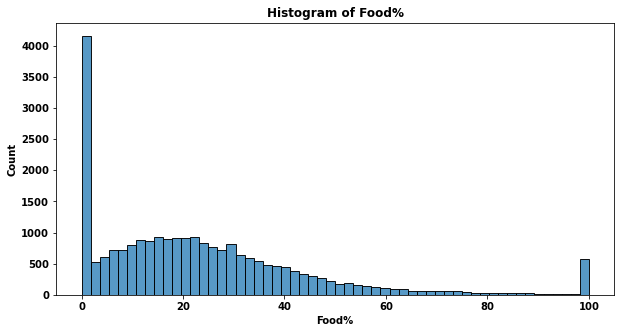

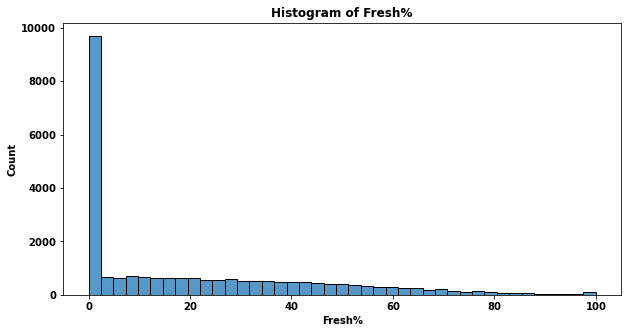

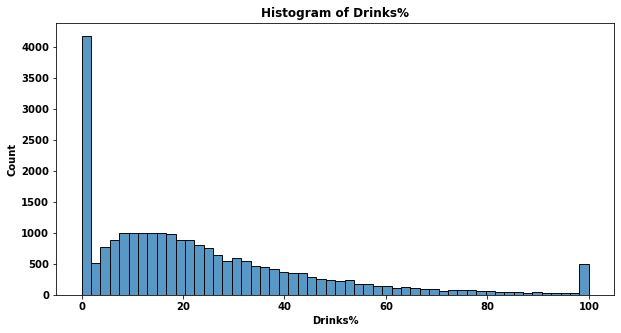

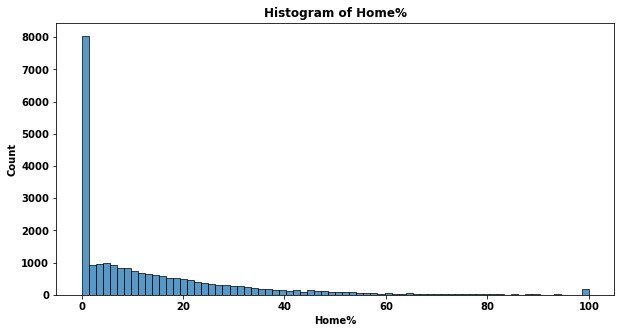

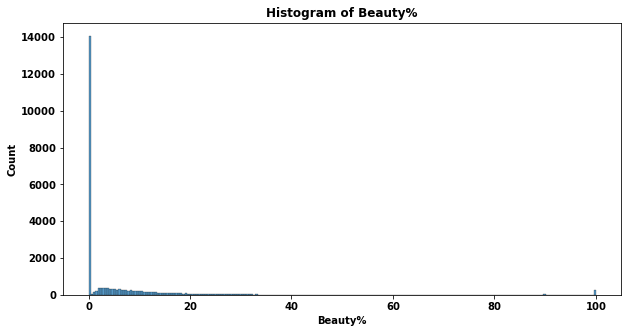

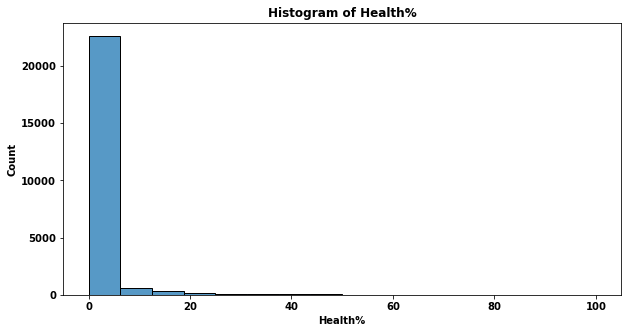

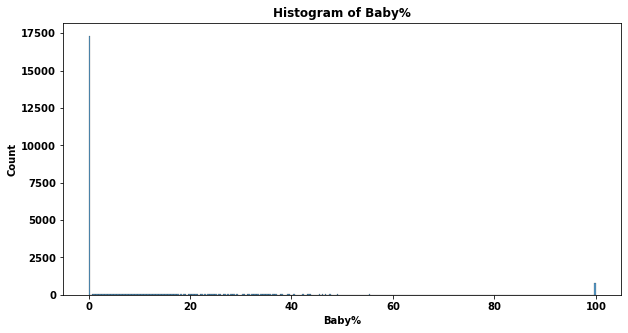

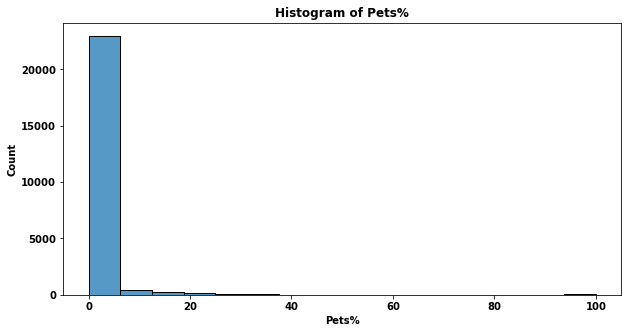

In [13]:
col_list = ['Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%', 'Pets%']
create_hist(ulabox_train, col_list)

The following function creates boxplots for each response variable grouped by another categorical variable.

In [14]:
def create_box(data, category, col_list, order):
    for i in range(len(col_list)):
        plt.figure(figsize=(10,5))
        sns.boxplot(x = category, y = col_list[i], data = data, order = order)
        plt.title('Boxplot of '+ col_list[i] + ' by ' + category)
        plt.show()
        i+=1

The distribution of all the product categories seem to have no noticeable difference between each day of the week.

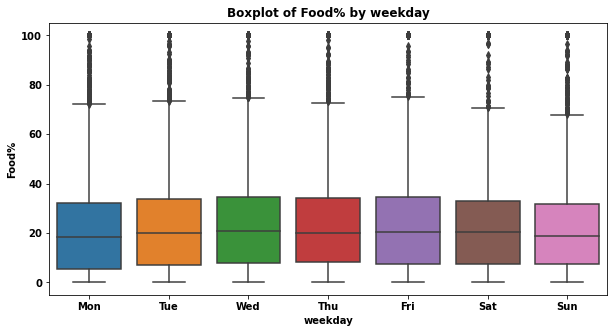

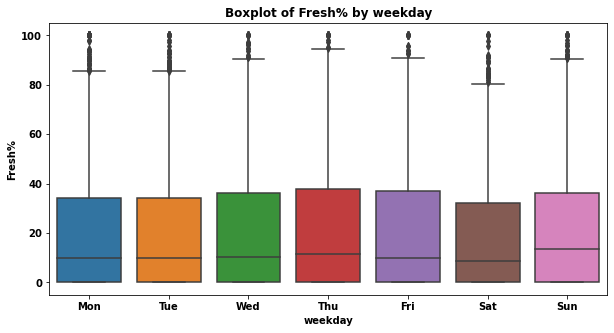

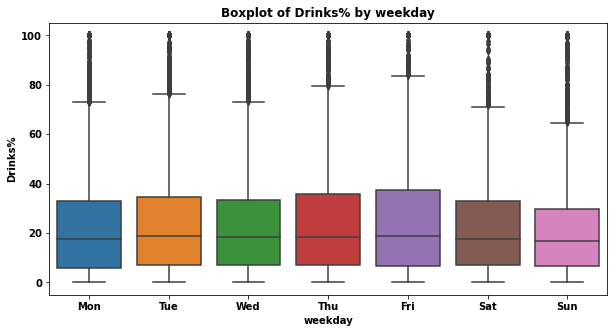

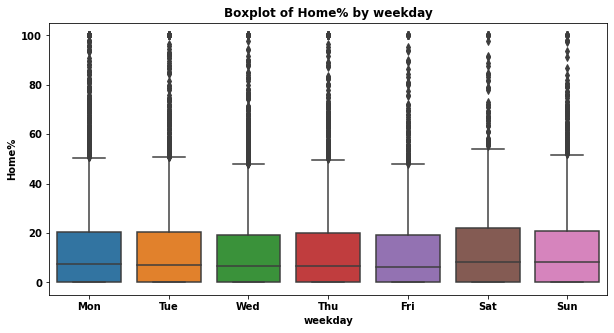

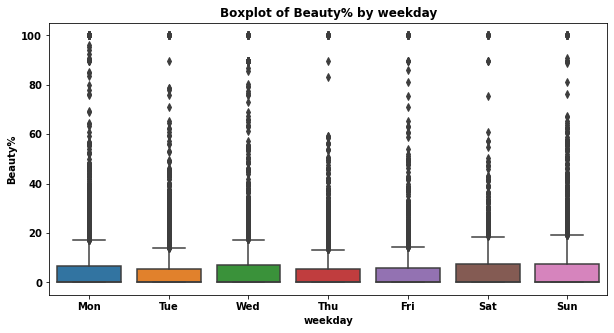

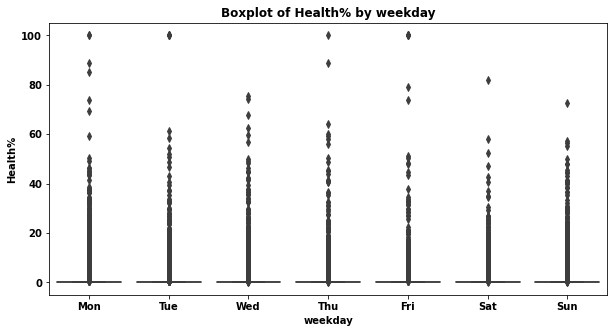

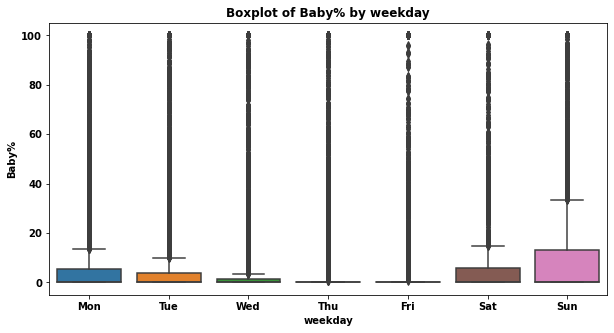

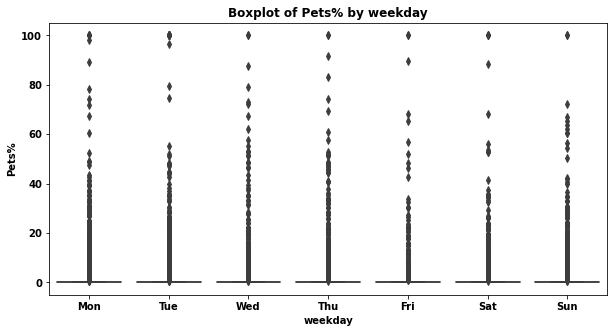

In [15]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
create_box(ulabox_train, 'weekday', col_list, day_order)

The distribution of all the product categories also seem to have no noticeable difference between each hour of the 
day.

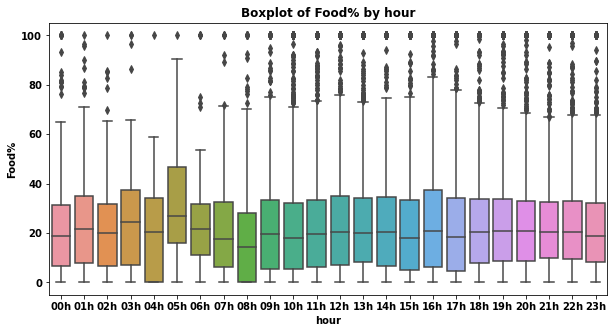

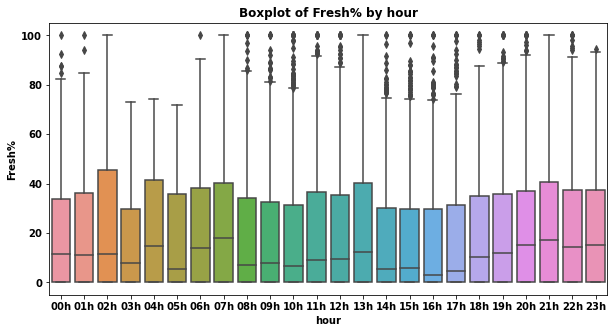

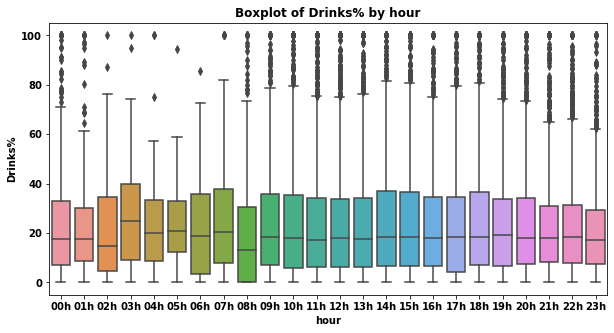

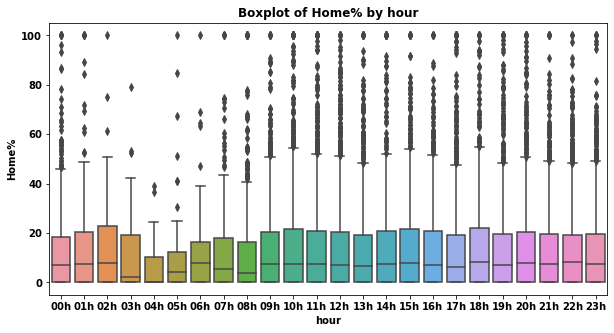

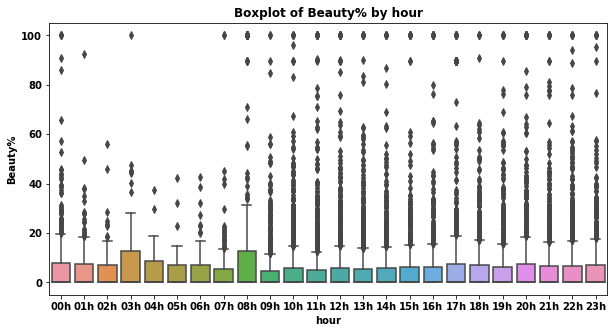

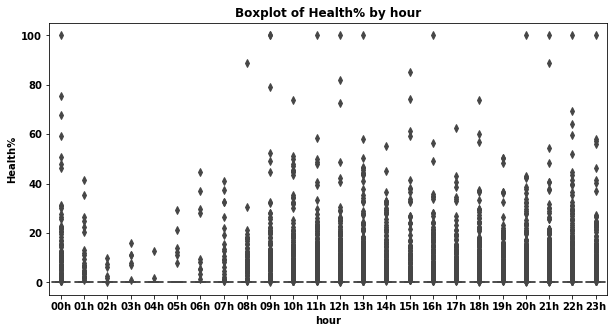

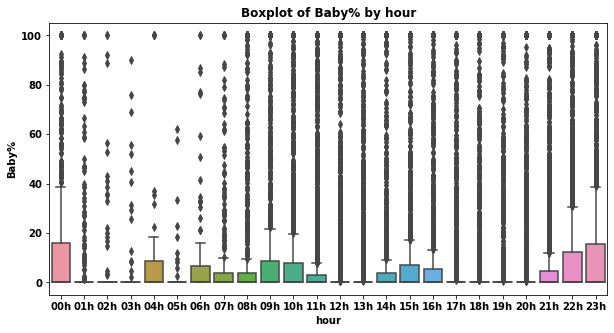

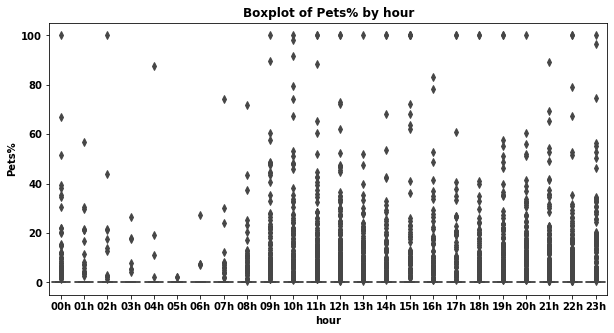

In [16]:
time_order = sorted(ulabox_data['hour'].unique())
create_box(ulabox_train, 'hour', col_list, time_order)

The following function creates scatterplots for each response variable compared to another numerical variable.

In [17]:
def create_scatter(data, x_num, col_list):
    for i in range(len(col_list)):
        plt.figure(figsize=(10,5))
        sns.scatterplot(x = x_num, y = col_list[i], data = data)
        plt.title('Scatterplot of '+ col_list[i] + ' by ' + x_num)
        plt.show()
        i+=1

All of the product categories seem to have no noticeable correlation with the total number of items.

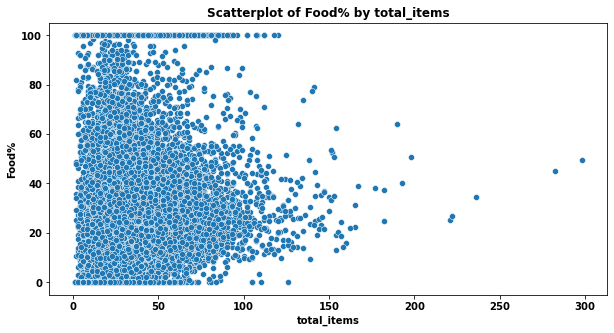

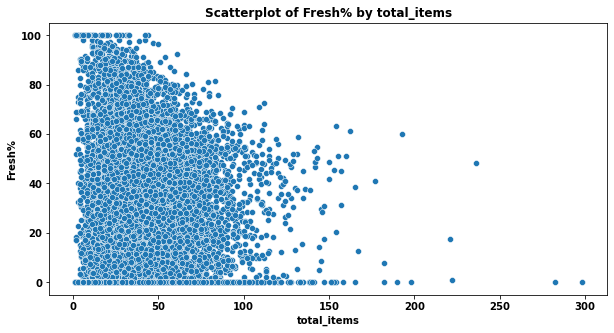

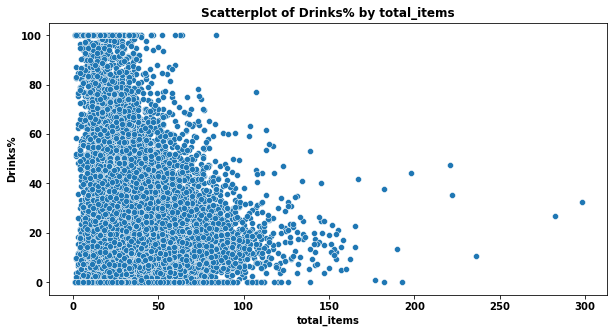

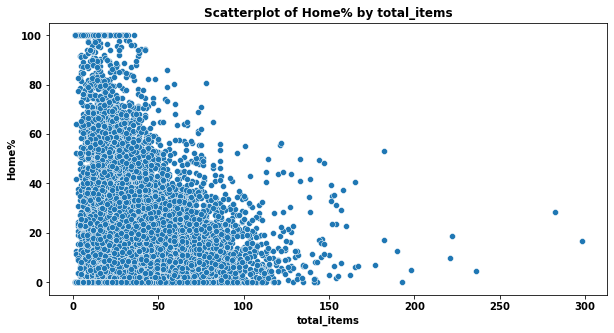

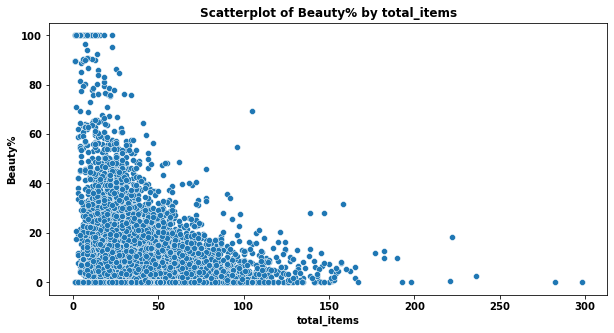

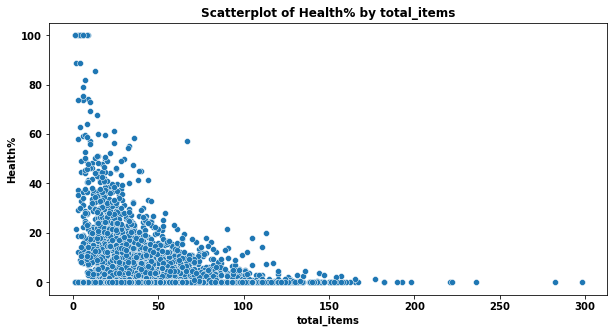

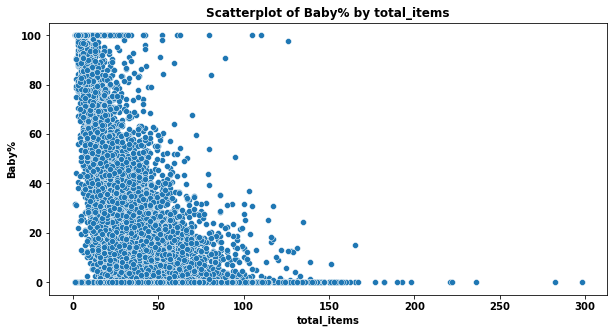

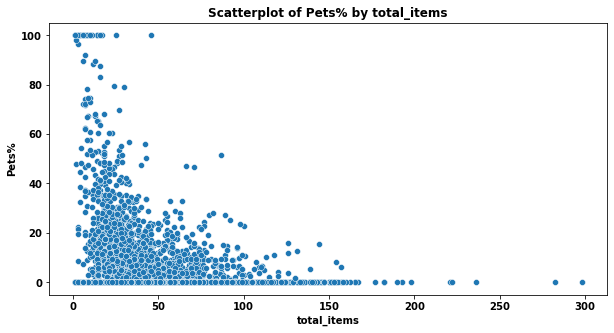

In [18]:
create_scatter(ulabox_train, 'total_items', col_list)

All of the product categories also seem to have no noticeable correlation with the percentage of discount.

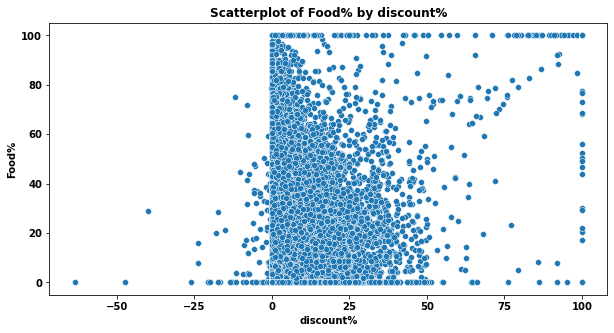

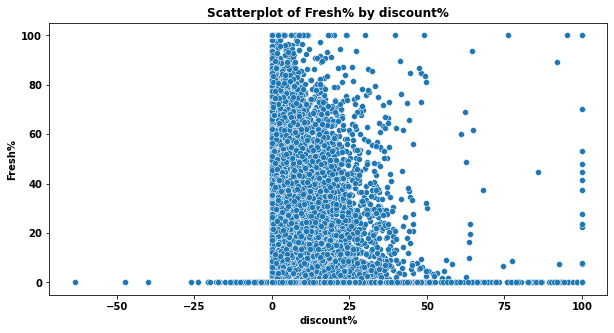

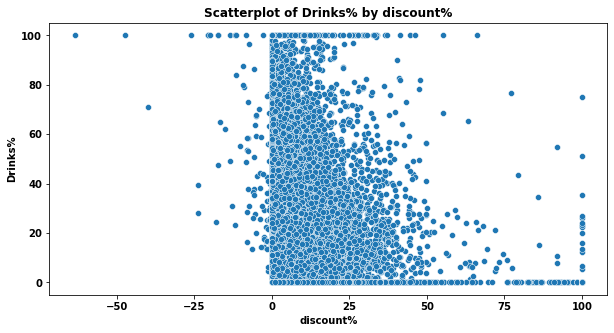

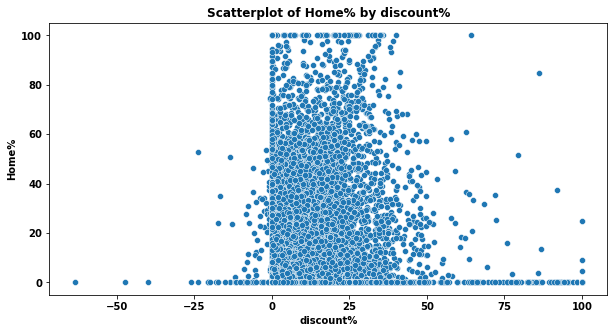

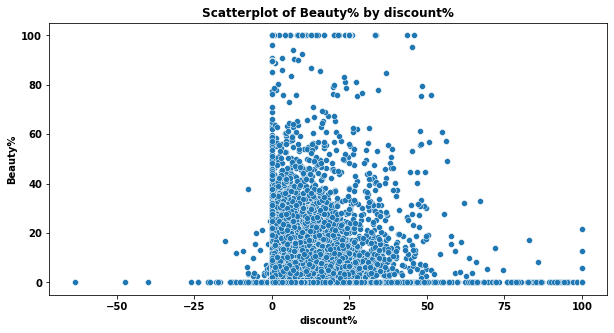

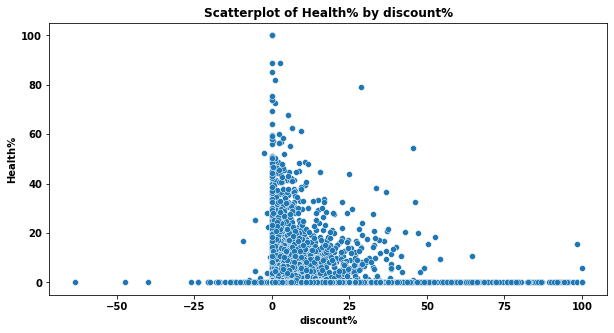

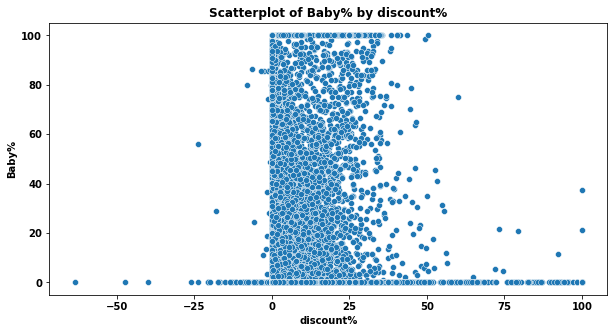

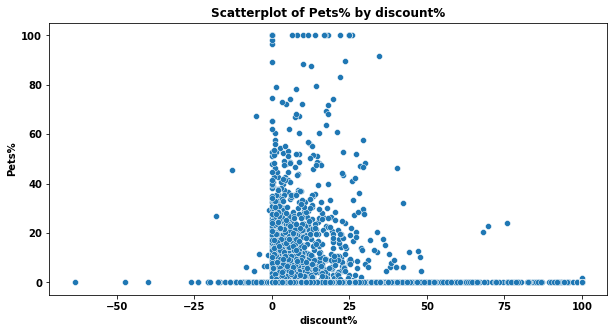

In [19]:
create_scatter(ulabox_train, 'discount%', col_list)

### Modeling Approaches

The share of customer spending for each product category could be modeled as a probability distribution, where the probabilities can predict the expected share per category for the next order. Bayesian methods using MCMC (Markov Chain Monte Carlo) could be an appropriate modeling technique to estimate the probability distribution.

However, there are some caveats to consider. The shares of customer spending are highly skewed, where 3 out of 8 product categories represent most of the customer spending. This needs to be accounted for during sampling process if MCMC is used. The independent variables also do not have any noticeable trends with the share of customer spending. Therefore, feature engineering and trials of different algorithms may be required to create an effective model.